## Importar librerías

In [36]:
import janitor
import nhanes.load
import numpy as np
import pandas as pd
import missingno

## Importar funciones personalizadas

In [37]:
%run pandas-missing-extension.ipynb

## Cargar los datos de NHANES

In [38]:
nhanes_raw_df = (
    nhanes.load.load_NHANES_data(year='2017-2018')
    .clean_names(case_type='snake')       ## comvierte las palabras de CamelCase a camel_case
)
nhanes_raw_df.shape

(8366, 197)

## Procesar los datos de NHANES

In [94]:
nhanes_processed_df = (
    nhanes_raw_df
    .select_columns(
        'general_health_condition',
        'age_in_years_at_screening',
        'gender',
        'current_selfreported_height_inches',
        'current_selfreported_weight_pounds',
        'doctor_told_you_have_diabetes',
        '60_sec_pulse30_sec_pulse2',
        'total_cholesterol_mgdl'
    )
    .rename_columns(
        {
            'age_in_years_at_screening' : 'age',
            'current_selfreported_height_inches' : 'height',
            'current_selfreported_weight_pounds' : 'weight',
            'doctor_told_you_have_diabetes' : 'diabetes',
            '60_sec_pulse30_sec_pulse2' : 'pulse',
            'total_cholesterol_mgdl': 'total_cholesterol'

        }
    )
)
nhanes_processed_df

/home/juanme/Desktop/curso-datos-faltantes-imputacion/.venv/lib/python3.11/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `jn.select` instead.
  return method(self._obj, *args, **kwargs)
/home/juanme/Desktop/curso-datos-faltantes-imputacion/.venv/lib/python3.11/site-packages/pandas_flavor/register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)


,general_health_condition,age,gender,height,weight,diabetes,pulse,total_cholesterol
SEQN,,,,,,,,
93703.0,NaN,2.0,Female,NaN,NaN,0,NaN,NaN
93704.0,NaN,2.0,Male,NaN,NaN,0,NaN,NaN
93705.0,Good,66.0,Female,63.0,165.0,0,52.0,157.0
93706.0,Very good,18.0,Male,68.0,145.0,0,82.0,148.0
93707.0,Good,13.0,Male,NaN,NaN,0,100.0,189.0
...,...,...,...,...,...,...,...,...
102952.0,Very good,70.0,Female,NaN,117.0,Borderline,68.0,119.0
102953.0,Fair or,42.0,Male,65.0,218.0,0,78.0,182.0
102954.0,Good,41.0,Female,66.0,150.0,0,78.0,172.0


In [95]:
nhanes_processed_df.describe()    ## Notemos que hay alturas y pesos de 9999, lo cual podria signigicar nulos escondidos

,age,height,weight,pulse,total_cholesterol
count,8366.000000,5776.000000,5828.000000,6742.000000,6738.000000
mean,35.830026,272.224030,350.995710,73.749926,179.894627
std,24.905061,1414.518896,1280.908078,12.380546,40.602248
min,1.000000,49.000000,72.000000,34.000000,76.000000
25%,12.000000,63.000000,145.000000,66.000000,151.000000
50%,33.000000,66.000000,171.500000,72.000000,176.000000
75%,59.000000,70.000000,208.000000,82.000000,204.000000
max,80.000000,9999.000000,9999.000000,136.000000,446.000000


In [96]:
nhanes_processed_df.height.unique()   ## Revisando mas a fondo, notamos que tambien los hay de 7777

array([  nan,   63.,   68.,   60.,   62.,   69.,   70.,   61.,   67.,
         65.,   75.,   66.,   73.,   59.,   72.,   76.,   64., 9999.,
         71.,   53.,   56.,   74.,   77.,   58.,   54.,   57.,   49.,
         78.,   55.,   79.,   50., 7777.,   81.,   82.,   51.])

In [97]:
nhanes_processed_df.replace(
    {
        'height': {
            9999: np.nan,
            7777: np.nan
        },
        'weight': {
            9999: np.nan,
            7777: np.nan
        },

        'diabetes': {
            'Borderline': np.nan
        }
    }, inplace = True
)
nhanes_processed_df

,general_health_condition,age,gender,height,weight,diabetes,pulse,total_cholesterol
SEQN,,,,,,,,
93703.0,NaN,2.0,Female,NaN,NaN,0,NaN,NaN
93704.0,NaN,2.0,Male,NaN,NaN,0,NaN,NaN
93705.0,Good,66.0,Female,63.0,165.0,0,52.0,157.0
93706.0,Very good,18.0,Male,68.0,145.0,0,82.0,148.0
93707.0,Good,13.0,Male,NaN,NaN,0,100.0,189.0
...,...,...,...,...,...,...,...,...
102952.0,Very good,70.0,Female,NaN,117.0,NaN,68.0,119.0
102953.0,Fair or,42.0,Male,65.0,218.0,0,78.0,182.0
102954.0,Good,41.0,Female,66.0,150.0,0,78.0,172.0


In [98]:
nhanes_processed_df.diabetes.unique()

array(['0', nan, '1'], dtype=object)

In [99]:
nhanes_processed_df.missing.sort_variables_by_missingness().missing.missing_variable_summary()

,variable,n_missing,n_cases,pct_missing
0,height,2710,8366,32.393019
1,weight,2642,8366,31.580206
2,general_health_condition,2402,8366,28.711451
3,total_cholesterol,1628,8366,19.459718
4,pulse,1624,8366,19.411905
5,diabetes,179,8366,2.139613
6,gender,0,8366,0.000000
7,age,0,8366,0.000000


In [100]:
### NOtemos que hay muy pocos valores faltantes para la diabetes, y vamos a suponer que son MCAR, por
## lo que los podemos dropear
nhanes_processed_df.dropna(
    subset = ['diabetes'],
    how='any'
)

,general_health_condition,age,gender,height,weight,diabetes,pulse,total_cholesterol
SEQN,,,,,,,,
93703.0,NaN,2.0,Female,NaN,NaN,0,NaN,NaN
93704.0,NaN,2.0,Male,NaN,NaN,0,NaN,NaN
93705.0,Good,66.0,Female,63.0,165.0,0,52.0,157.0
93706.0,Very good,18.0,Male,68.0,145.0,0,82.0,148.0
93707.0,Good,13.0,Male,NaN,NaN,0,100.0,189.0
...,...,...,...,...,...,...,...,...
102951.0,NaN,4.0,Male,NaN,NaN,0,NaN,NaN
102953.0,Fair or,42.0,Male,65.0,218.0,0,78.0,182.0
102954.0,Good,41.0,Female,66.0,150.0,0,78.0,172.0


In [101]:
## Ahora, sabemos que diabetes son numeros, y no un objeto, por lo que lo podemos castear
nhanes_processed_df = nhanes_processed_df.transform_column(
    column_name = 'diabetes',
    function = lambda s: s.astype('Int64'),   ## Se debe hacer con int64, ya que es el valor que permite tener nans con enteros
    elementwise = False,    ## Para que regrese una serie y jno un elemento
)

In [102]:
nhanes_processed_df.diabetes

SEQN
93703.0        0
93704.0        0
93705.0        0
93706.0        0
93707.0        0
            ... 
102952.0    <NA>
102953.0       0
102954.0       0
102955.0       0
102956.0       0
Name: diabetes, Length: 8366, dtype: Int64

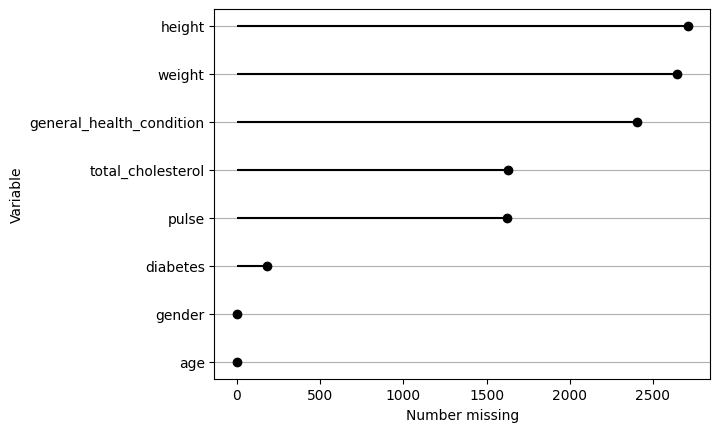

In [103]:
nhanes_processed_df.missing.missing_variable_plot()

## Visualizar los valores faltantes

<Axes: >

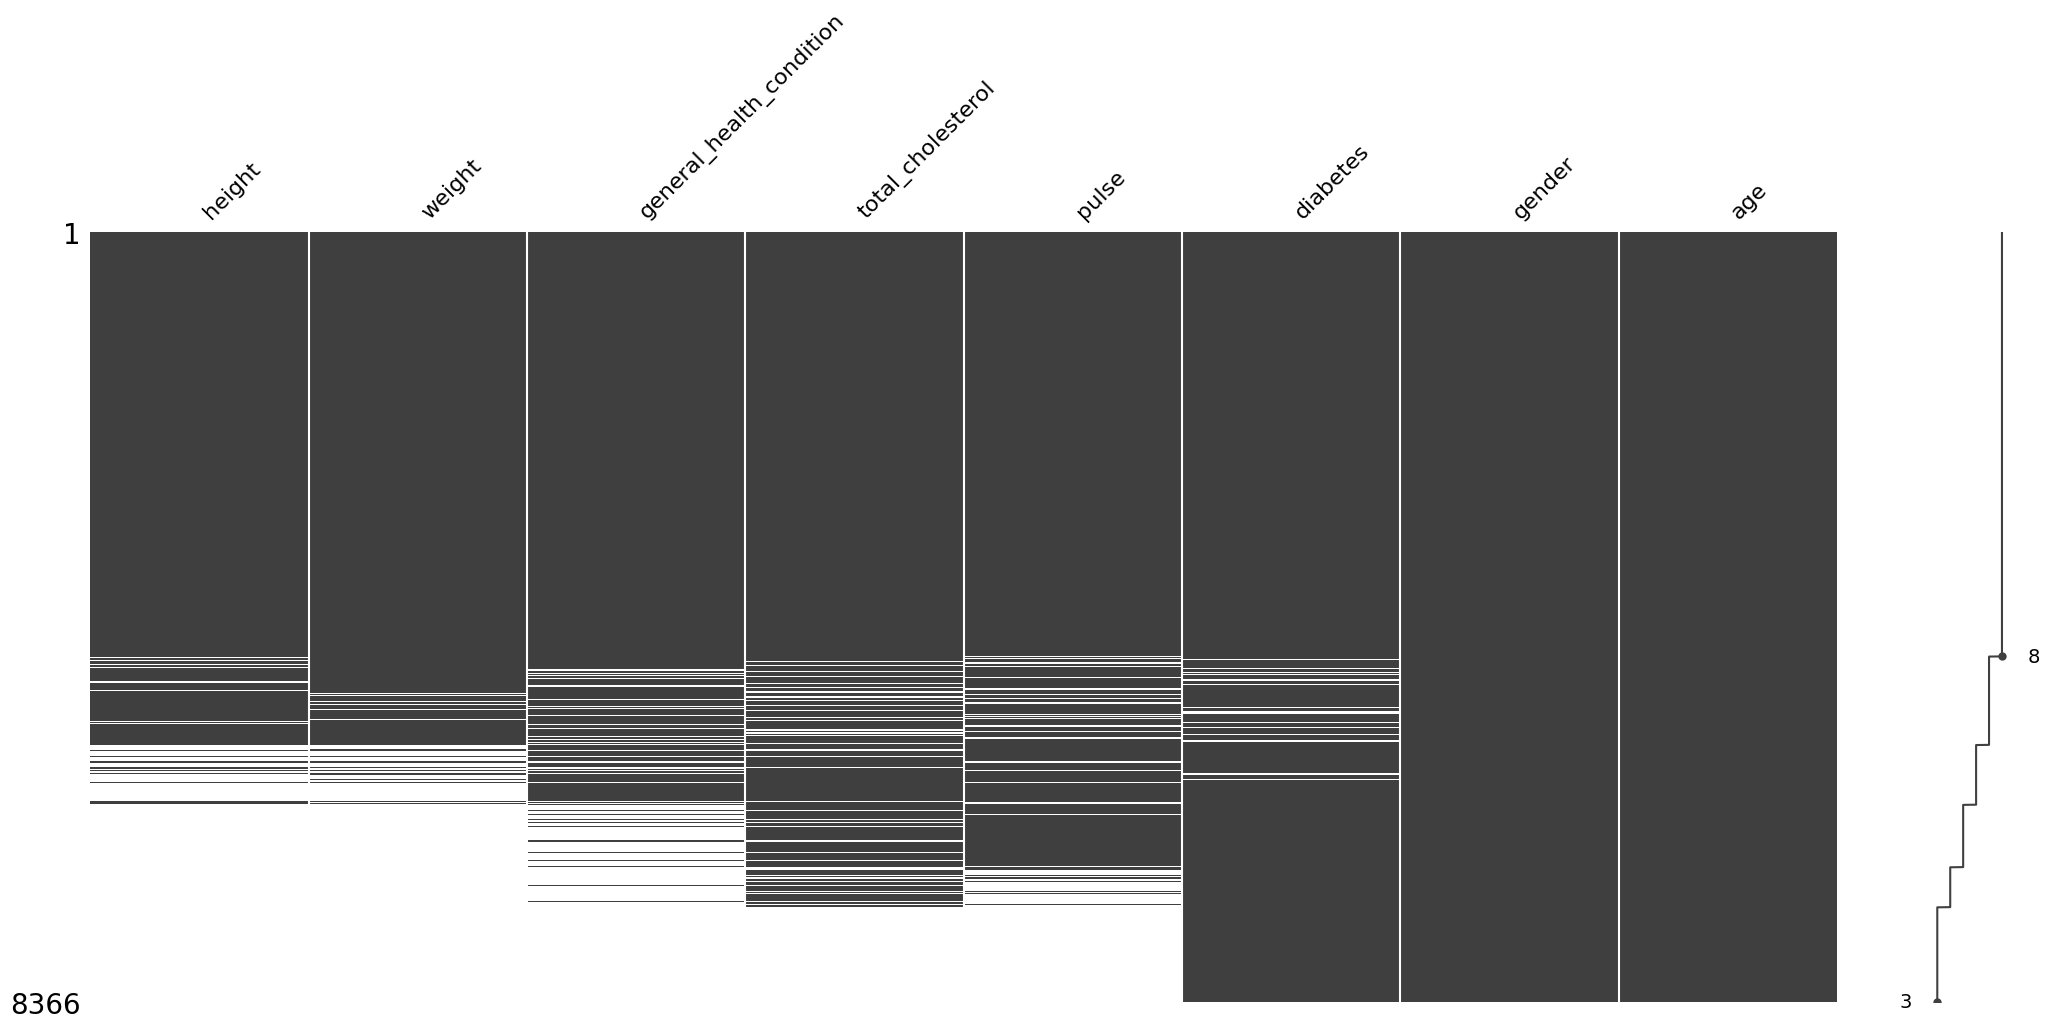

In [104]:
nhanes_df = nhanes_processed_df
nhanes_df.missing.sort_variables_by_missingness().pipe(missingno.matrix, sort='descending')

/home/juanme/Desktop/curso-datos-faltantes-imputacion/.venv/lib/python3.11/site-packages/upsetplot/plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
/home/juanme/Desktop/curso-datos-faltantes-imputacion/.venv/lib/python3.11/site-packages/upsetplot/plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work beca

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

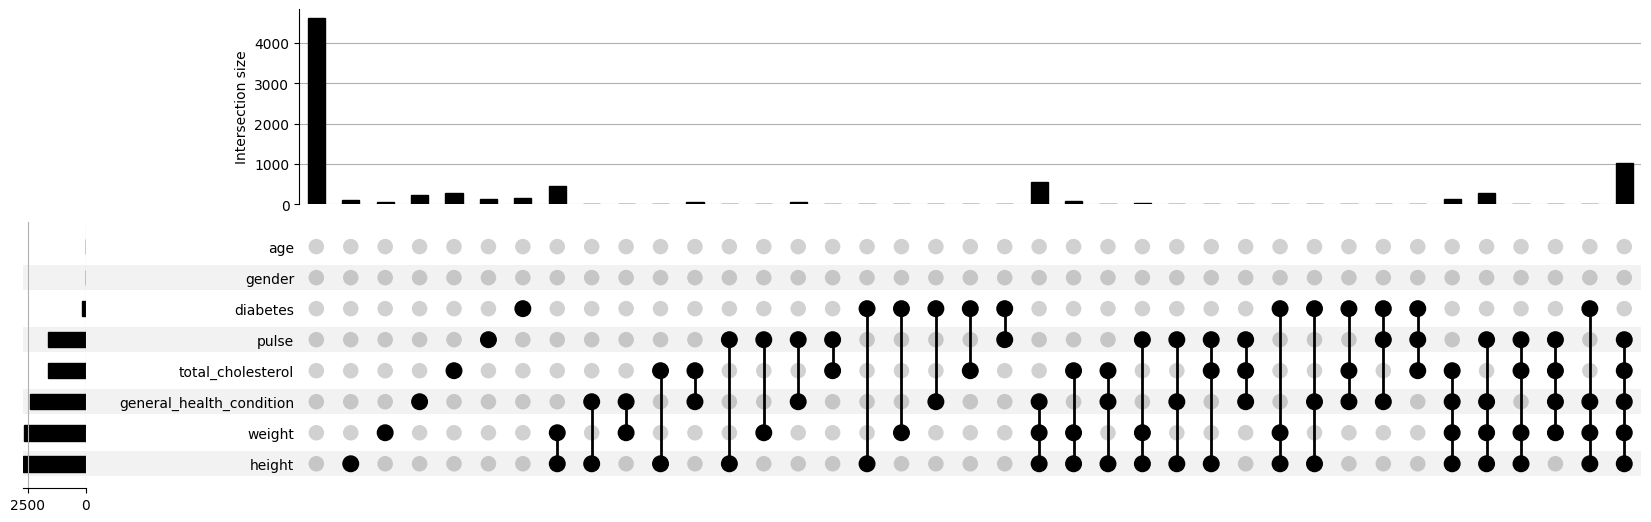

In [105]:
nhanes_df.missing.sort_variables_by_missingness().missing.missing_upsetplot() 

## Eliminar valores faltantes

<Axes: >

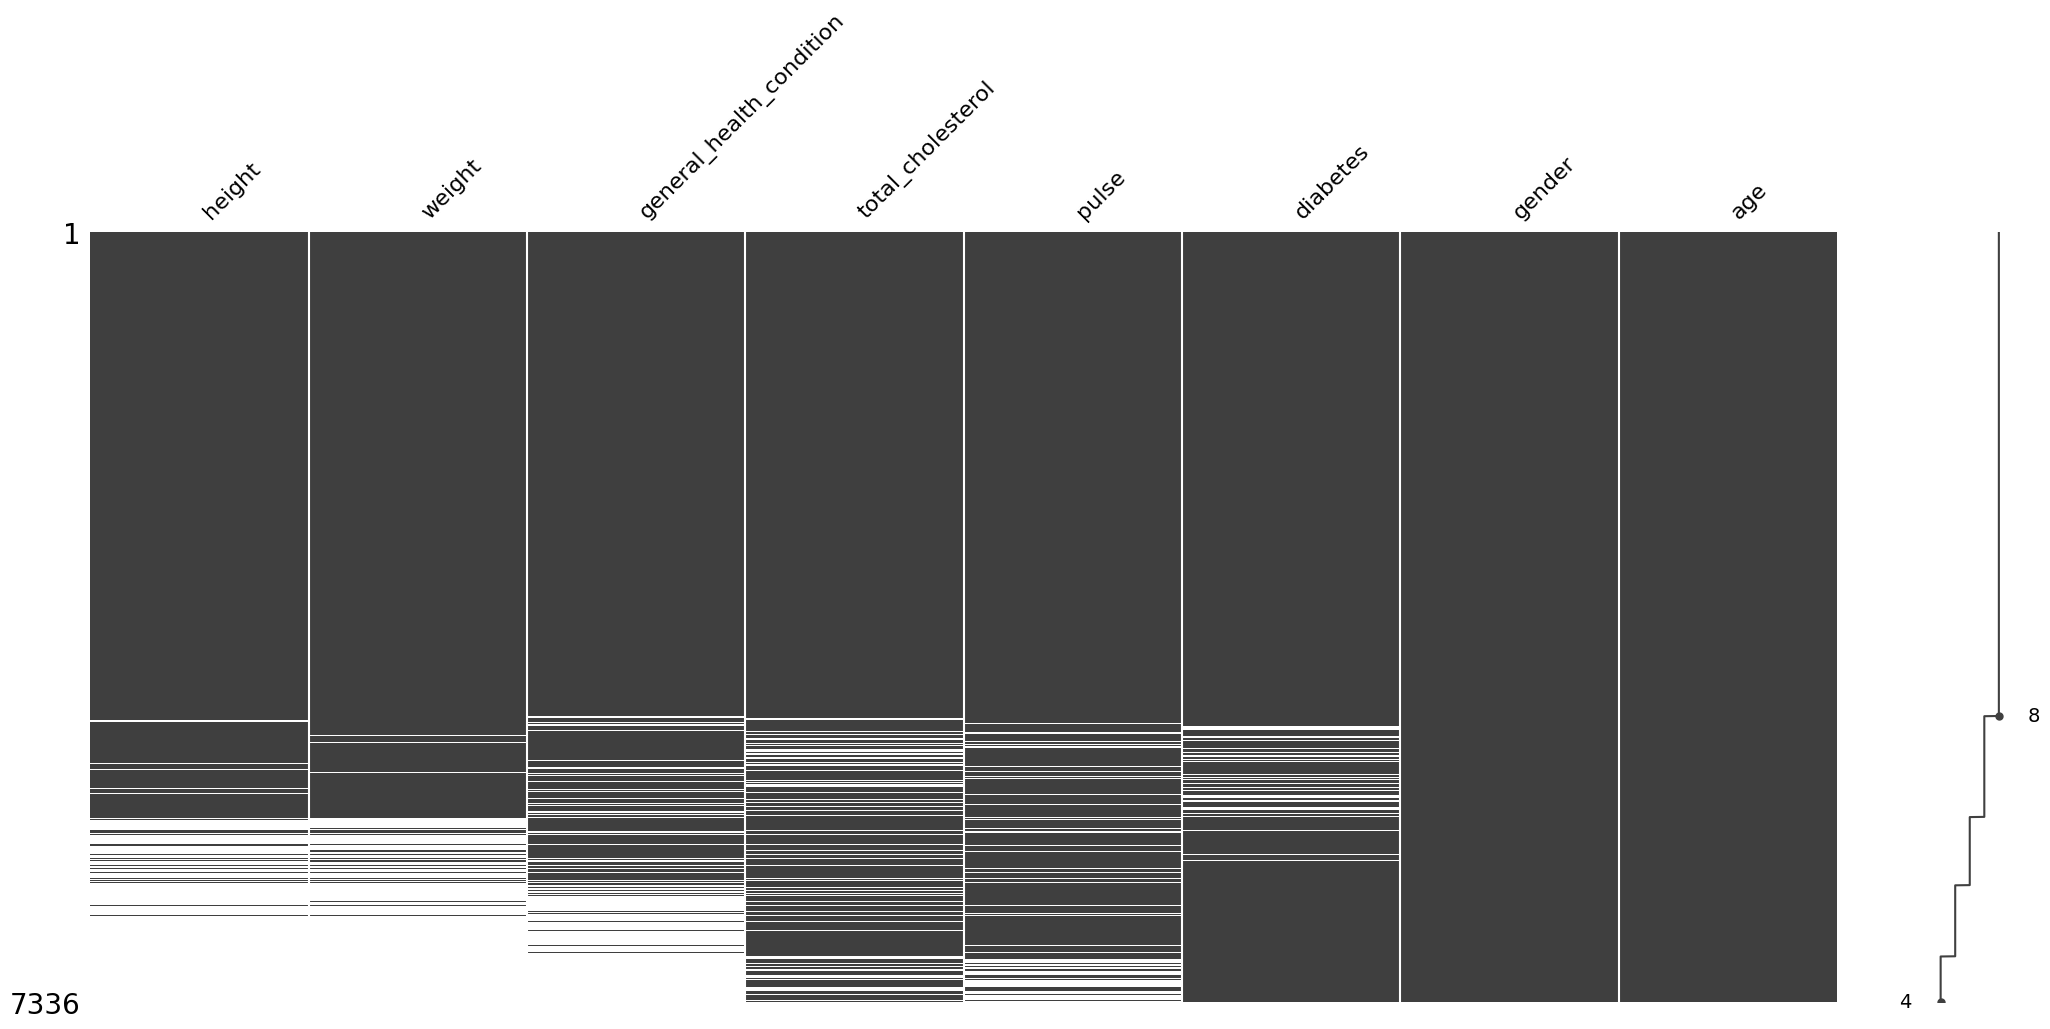

In [108]:
## Notemos que hay mas de mil registros enfocados en el nan de las 5 variables que podrían interesarnos
## No debe ser uina eliminación tan arbitraria, pero por fines practicos se vna a eliminar los que falten todos
nhanes_df = (
    nhanes_df
    .dropna(
        subset = ['pulse', 'total_cholesterol', 'general_health_condition', 'weight', 'height'],
        how='all'
    )
    .missing.sort_variables_by_missingness()
)

nhanes_df.pipe(missingno.matrix, sort='descending')

In [109]:
## Notemos que ahora se facililta la imútación ya que no hay una faltantte completa en todas las variables que queremos predecir

nhanes_df.shape

(7336, 8)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=bdf84ff9-f66c-44c7-a67c-ca1115a2b683' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>